# Športno plezanje

Spodaj se nahaja moj projekt pri predmetu Programiranje1. Analiziral bom rezultate tekem državnega prvenstva v športnem plezanju.

## Priprava

Na začetku naložimo paket pandas za delo s podatki. V preambuli je še nekaj vrstic za lepše in lažje delo ter za risanje grafov.

In [1]:
import pandas as pd

#pd.options.display.max_rows = 16

%matplotlib inline

rezultati = pd.read_csv('../podatki.csv')
kategorije = pd.read_csv('../kategorije.csv', index_col='index')

Najprej si poglejmo naše podatke

In [2]:
rezultati

,leto,kategorija,stevilo tekmovalcev,1. mesto,2. mesto,zadnje mesto,povprecje
0,2016,1,22,328,311,12,149.55
1,2016,2,19,380,333,31,156.68
2,2016,3,31,330,325,4,115.71
3,2016,4,18,360,360,58,172.67
4,2016,5,20,400,313,28,160.50
5,2016,6,21,335,307,44,159.81
6,2016,7,12,400,310,37,191.67
7,2016,8,11,345,315,150,216.18
8,2016,9,8,260,231,65,161.75
9,2016,10,9,280,247,43,153.89


In [3]:
kategorije

,kategorija
index,
1,cicibanke
2,cicibani
3,mlajse deklice
4,mlajsi decki
5,starejse deklice
6,starejsi decki
7,kadetinje
8,kadeti
9,mladinke


## Analiza

In [4]:
def preimenuj_stolpec(tabela, stolpec, novo_ime):
    #preimenuje željeni stolpec tabele in vrne tabelo le s preimenovanim stolpcem.
    pomozna_tabela = tabela
    pomozna_tabela[novo_ime] = tabela[stolpec]
    return pomozna_tabela[novo_ime]

In [5]:
rezultati_po_letih = rezultati.groupby("leto")

#povprečno število tekmovalcev glede na kategorijo v posameznih letih
povp_st_tekmovalcev_kat1 = rezultati_po_letih.mean()[["stevilo tekmovalcev"]]
povp_st_tekmovalcev_kat = preimenuj_stolpec(povp_st_tekmovalcev_kat1, "stevilo tekmovalcev", "povprecno stevilo tekmovalcev")

#število vseh tekmovalcev v posameznem letu
st_tekmovalcev_kat1 = rezultati_po_letih.sum()[["stevilo tekmovalcev"]]
st_tekmovalcev_kat = preimenuj_stolpec(st_tekmovalcev_kat1, "stevilo tekmovalcev", "stevilo vseh tekmovalcev")

#sedaj ta 2 stolpca združimo
stevilo_tekmovalcev = pd.concat([st_tekmovalcev_kat,povp_st_tekmovalcev_kat], axis=1)
stevilo_tekmovalcev

,stevilo vseh tekmovalcev,povprecno stevilo tekmovalcev
leto,,
2003,269,22.416667
2004,244,20.333333
2005,236,19.666667
2006,244,20.333333
2007,250,20.833333
2008,270,22.500000
2009,268,22.333333
2010,274,22.833333
2011,292,24.333333


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000008A81FD0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000008AFAEF0>], dtype=object)

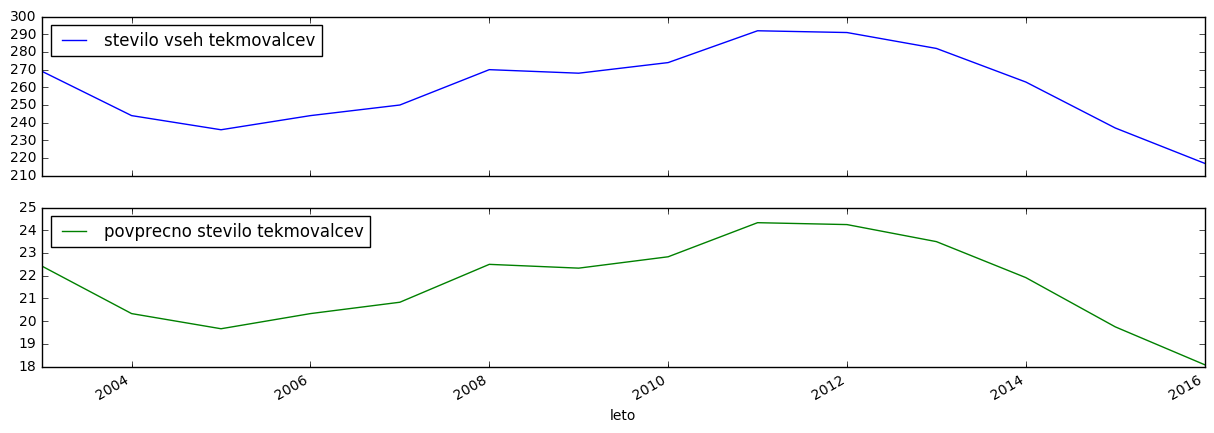

In [6]:
stevilo_tekmovalcev.plot(subplots=True, figsize=(15, 5))

Vidimo, da je bilo v prvih letih večje število tekmovalcev, kar je verjetno posledica same uvedbe tekmovanja, z leti pa je to število upadlo. Število tekmovalcev je nato med letoma 2005 in 2011 raslo kot sem predvideval, sedaj pa se dogaja velik upad števila tekmovalcev kar je v nasprotju z mojimi pričakovanji.

Sedaj podobno preverimo še za mlajše kategorije:

In [7]:
rezultati_po_mlajsih_kat = rezultati[(rezultati["kategorija"] <= 4)]

#povprečno število mlajsih tekmovalcev glede na kategorijo v posameznih letih
povp_st_tekmovalcev_mlajsih_kat1 = rezultati_po_mlajsih_kat.groupby("leto").mean()[["stevilo tekmovalcev"]]
povp_st_tekmovalcev_mlajsih_kat = preimenuj_stolpec(povp_st_tekmovalcev_mlajsih_kat1, "stevilo tekmovalcev", "povprecno stevilo tekmovalcev")

#število vseh mlajsih tekmovalcev v posameznem letu
st_tekmovalcev_mlajsih_kat1 = rezultati_po_mlajsih_kat.groupby("leto").sum()[["stevilo tekmovalcev"]]
st_tekmovalcev_mlajsih_kat = preimenuj_stolpec(st_tekmovalcev_mlajsih_kat1, "stevilo tekmovalcev", "stevilo vseh tekmovalcev")

#sedaj ta 2 stolpca združimo
stevilo_mlajsih_tekmovalcev = pd.concat([st_tekmovalcev_mlajsih_kat,povp_st_tekmovalcev_mlajsih_kat], axis=1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000008DD7470>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000009146E80>], dtype=object)

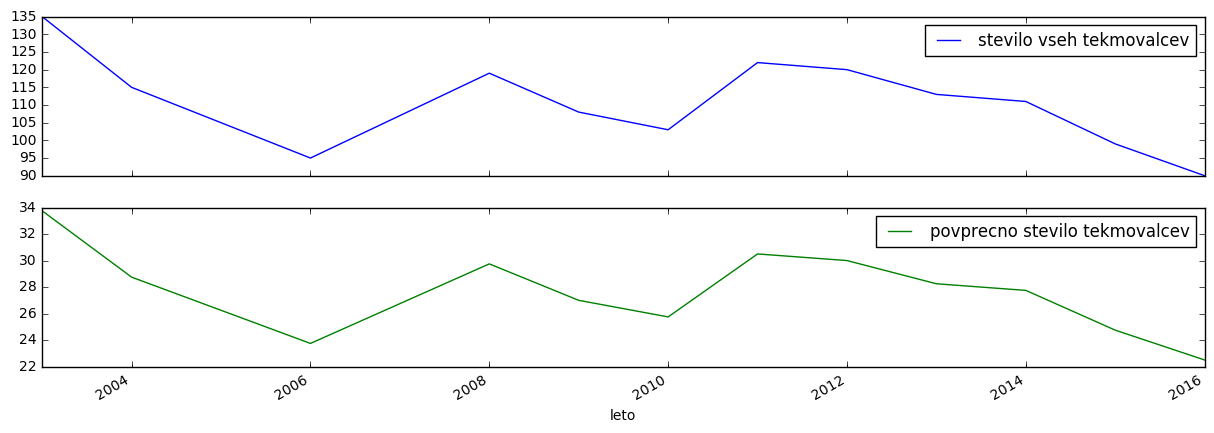

In [8]:
stevilo_mlajsih_tekmovalcev.plot(subplots=True, figsize=(15, 5))

Rezultati pokažejo, da (podobno kot prej) število tekmovalcev sicer do leta 2011 je naraslo vendar pa ne narašča več. Ovržena je torej tudi ta hipoteza.

Poglejmo v kateri kategoriji je bilo skozi leta največ tekmovalcev:

In [9]:
rezultati.groupby("kategorija").sum()["stevilo tekmovalcev"].sort_values(ascending=False)

kategorija
12    476
3     402
2     396
1     386
4     358
6     353
5     323
8     260
11    242
7     193
10    162
9      86
Name: stevilo tekmovalcev, dtype: int64

Kot sem predvideval število tekmovalcev od mlajših kategorij proti starejšim, z izjemo članov, upada.

Kot zanimivost sem pogledal še kdaj in v kateri kategoriji je bilo največ tekmovalcev. 

In [10]:
najvec_tekmovalcev = rezultati["stevilo tekmovalcev"].max()
rezultati[rezultati["stevilo tekmovalcev"] == najvec_tekmovalcev][["leto","kategorija","stevilo tekmovalcev"]]

,leto,kategorija,stevilo tekmovalcev
157,2003,2,43


Pričakovano je bilo to v najmlajši moški kategoriji. Zanimivo je, da se je to zgodilo v prvem letu od uvedbe samih tekem državnega prvenstva.

In [11]:
#povprečna razlika med prvim in drugim mestom v kategoriji po letih
razlika_prvi_leta = (rezultati_po_letih.mean()["1. mesto"] - rezultati_po_letih.mean()["2. mesto"]) / st_tekmovalcev_kat

#povprečna razlika med prvim mestom in povprečjem točk v kategoriji po letih
povp_razlika_leta = (rezultati_po_letih.mean()["1. mesto"] - rezultati_po_letih.mean()["povprecje"]) / st_tekmovalcev_kat

razlika = pd.concat([razlika_prvi_leta,povp_razlika_leta], axis=1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000091AAAC8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000AE5ED30>], dtype=object)

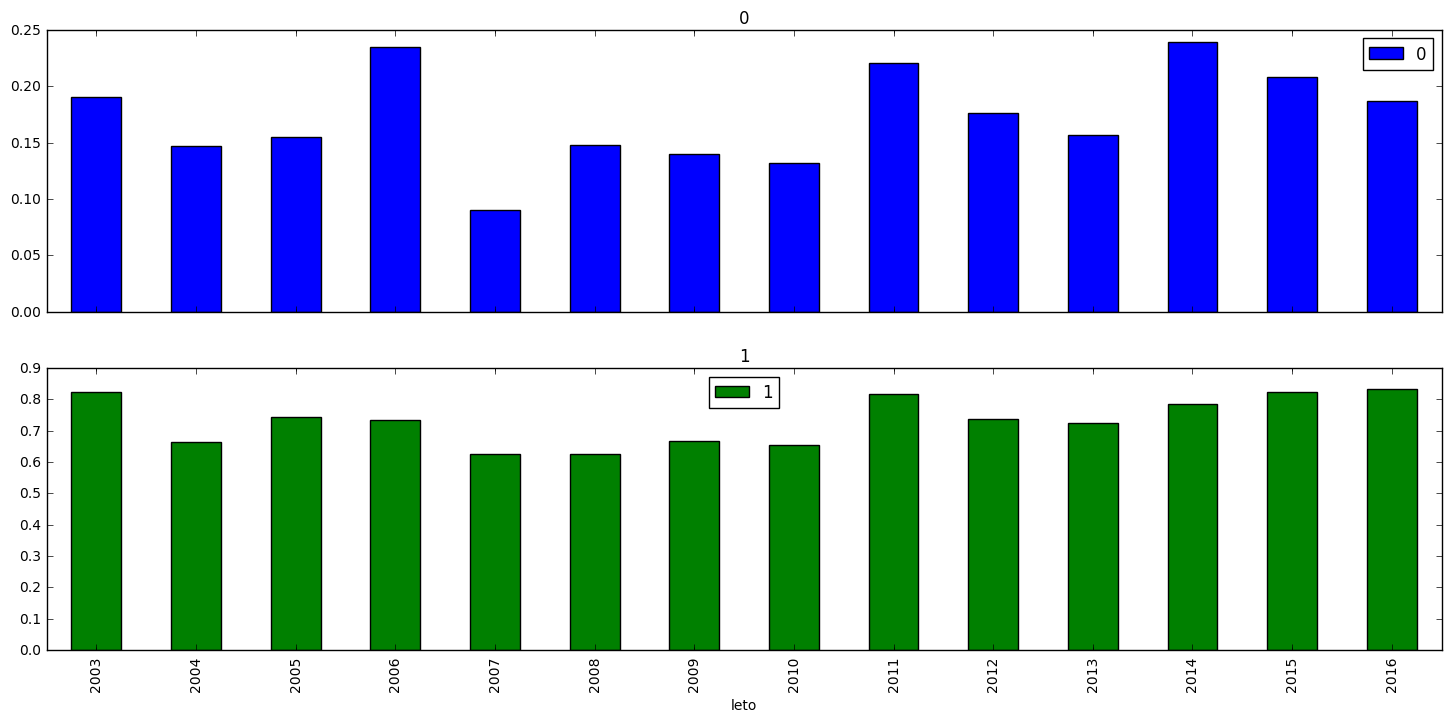

In [12]:
razlika.plot(subplots=True, kind="bar",figsize=(18, 8))

Hipotezo, da so razlike med tekmovalci naključne bom potrdil. Rezultati kažejo, da ta pri najboljših tekmovalcih ni povezana z leti. Pri povprečju so razlike seveda manjše vendar vseeno ni kakšne očitne povezave med let in razlikami med tekmovalci.

Sedaj analizirajmo še podatke o klubih. Za to moramo najprej uvoziti detoteki, ki vsebujeta te podatke:

In [13]:
klubi = pd.read_csv('../klubi.csv', index_col='index')
rezultati_klubi = pd.read_csv('../rezultati_klubi.csv')

In [14]:
klubi

,klubi
index,
1,Saleski AO
2,AO Kranj
3,PK Skofja Loka
4,PK Kamnik
5,SPO Radovljica
6,DRPK
7,AK Ravne
8,SD Proteus
9,SPO Celje


In [15]:
rezultati_klubi

,leto,mesto,klub,tocke
0,2016,1,1,5370
1,2016,2,2,4979
2,2016,3,3,4730
3,2016,4,4,4026
4,2016,5,5,3745
5,2016,6,6,3522
6,2016,7,7,3345
7,2016,8,8,2938
8,2016,9,9,2734
9,2016,10,10,2595


In [16]:
#tabeli rezultati_klubi pridružimo tabelo klubi, da lahko poleg leta in uvrstitve vidimo še ime kluba
rezultati_klubi_imena = rezultati_klubi.join(klubi, on="klub")
rezultati_klubi_imena

,leto,mesto,klub,tocke,klubi
0,2016,1,1,5370,Saleski AO
1,2016,2,2,4979,AO Kranj
2,2016,3,3,4730,PK Skofja Loka
3,2016,4,4,4026,PK Kamnik
4,2016,5,5,3745,SPO Radovljica
5,2016,6,6,3522,DRPK
6,2016,7,7,3345,AK Ravne
7,2016,8,8,2938,SD Proteus
8,2016,9,9,2734,SPO Celje
9,2016,10,10,2595,SPD Korenjak


In [17]:
#tabela vseh skupnih zmagovalcev
najboljši_klubi = rezultati_klubi_imena[rezultati_klubi_imena["mesto"] == 1]
najboljši_klubi

,leto,mesto,klub,tocke,klubi
0,2016,1,1,5370,Saleski AO
32,2015,1,2,5181,AO Kranj
66,2014,1,2,6015,AO Kranj
101,2013,1,2,5547,AO Kranj
134,2012,1,3,6549,PK Skofja Loka
165,2011,1,3,6871,PK Skofja Loka
195,2010,1,3,8046,PK Skofja Loka
225,2009,1,3,7735,PK Skofja Loka
259,2008,1,3,6879,PK Skofja Loka
291,2007,1,2,7496,AO Kranj


In [18]:
najboljši_klubi.groupby("klubi").size().sort_values(ascending=False)

klubi
PK Skofja Loka    7
AO Kranj          4
Saleski AO        1
SPO Trzic         1
dtype: int64

Najuspešnejša kluba v zgodovini sta torej res AO Kranj ter PK Škofja Loka.

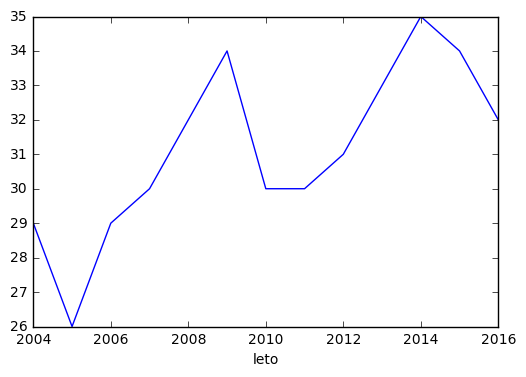

In [19]:
#število klubov na leto(bolj zanimivost)
rezultati_klubi.groupby("leto").size().plot()

In [20]:
#povprečna uvrstitev in število doseženih točk vsakega kluba
povprecje_klubi = rezultati_klubi_imena.groupby("klubi").mean()[["mesto", "tocke"]]
povprecje_klubi

,mesto,tocke
klubi,,
AK Crna,26.500000,204.500000
AK Ravne,8.923077,2734.076923
AK Sl. Gradec,18.666667,1701.777778
AK Slov. Bistrica,16.111111,1315.888889
AO Crnuce,20.666667,805.111111
AO Kamnik,14.833333,1481.166667
AO Kranj,2.153846,5514.538462
AO Lj - Matica,23.666667,511.333333
AO Mojstrana,22.666667,355.666667


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000009CB0B00>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000009D4EDA0>], dtype=object)

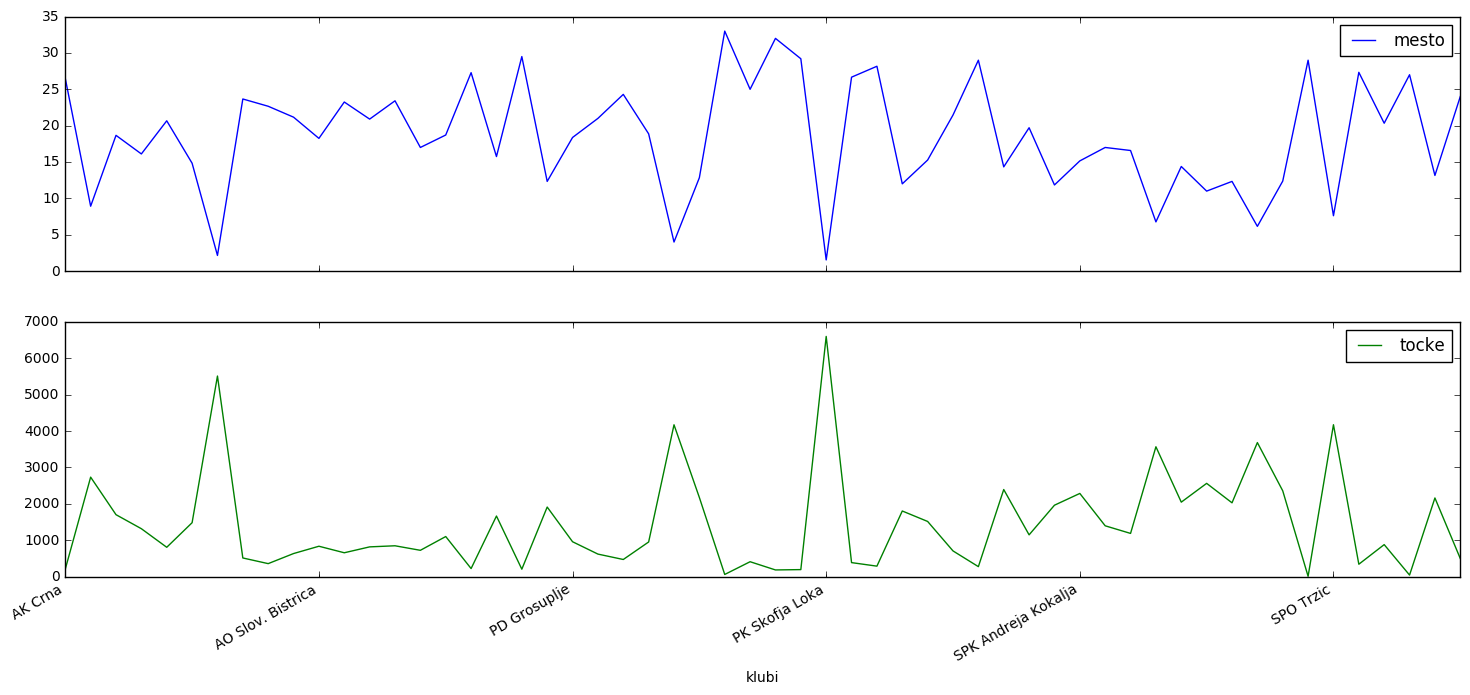

In [21]:
povprecje_klubi.plot(subplots=True, figsize=(18, 8))

In [22]:
povprecje_klubi["mesto"].sort_values().head()

klubi
PK Skofja Loka    1.538462
AO Kranj          2.153846
PK Kamnik         4.000000
SPO Radovljica    6.153846
SPO Celje         6.769231
Name: mesto, dtype: float64

In [23]:
povprecje_klubi["tocke"].sort_values(ascending=False).head()

klubi
PK Skofja Loka    6604.076923
AO Kranj          5514.538462
SPO Trzic         4175.538462
PK Kamnik         4174.000000
SPO Radovljica    3684.307692
Name: tocke, dtype: float64

In [24]:
#PK Kamnik
rezultati_klubi_imena[(rezultati_klubi_imena["klub"] == 4)][["leto", "mesto", "tocke"]]

,leto,mesto,tocke
3,2016,4,4026
35,2015,4,4322


In [25]:
#ŠPO Kamnik
rezultati_klubi_imena[(rezultati_klubi_imena["klub"] == 29) & (rezultati_klubi_imena["leto"] < 2015)][["leto", "mesto", "tocke"]]

,leto,mesto,tocke
69,2014,4,3769
105,2013,5,2996
145,2012,12,1443
176,2011,12,1610
206,2010,12,2038


In [26]:
#AO Kamnik
rezultati_klubi_imena[(rezultati_klubi_imena["klub"] == 47)][["leto", "mesto", "tocke"]]

,leto,mesto,tocke
232,2009,8,2770
267,2008,9,2258
303,2007,13,1751
335,2006,15,1395
370,2005,21,350
398,2004,23,363


Če za Kamnik rezultat gledamo skupaj dobimo:
mesto = 10,9230769
tocke = 2237,7692307

In [27]:
#Kamniška najboljša uvrstitev
min(
    min(rezultati_klubi_imena[(rezultati_klubi_imena["klub"] == 4)]["mesto"]),
    min(rezultati_klubi_imena[(rezultati_klubi_imena["klub"] == 29) & (rezultati_klubi_imena["leto"] < 2015)]["mesto"]),
    min(rezultati_klubi_imena[(rezultati_klubi_imena["klub"] == 47)]["mesto"])
)

4

Obe razpredelnici ne pokažeta povsem realnih rezultatov o vseh klubih saj so imeli nekareti klubi svoje tekmovalce le nekaj let ali pa je celo sam klub obstajal le nekaj let vendar so bili vsi najboljši klubi zastopani v skoraj vseh letih (izjema tu je Kamnik, ki se je enkrat preimenoval ter nato še enrat razcepil tako da smo ta klub pogledali posebej, poleg tega je to klub v keterem plezam tudi sam).

Hipotezo, ki sem jo postavil o uspešnosti klubov lahko torej potrdim. Skozi leta sta bila AO Kranj in PK Škofja Loka daleč najuspešnejša kluba, daleč za njima pa so potem ostali približno enakomerno razporejeni. Vidimo tudi da je v zadnjih letih močno napredoval Šaleški AO, v katerem med drugim trenira (sedaj) svetovno znana Janja Garnbret.